In [10]:
# import libraries
import math
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [40]:
# constants in SI
m = 9.10938291E-31 # mass of electron
q = 1.60217657E-19 # charge of electron
eV = 1.60217657E-19 # 1 electron volt in joules
ε = 8.85418782E-12 # permittivity of free space
h = 6.62606957E-34 # planck number
hbar = 1.054571800E-34 # reduced planck constant
Rydberg = 2.1787E-18 # Rydberg energy (in joules)
avogadro = 6.02214179E23
c = 299792458 # m/s

# units in SI
Å = 1E-10 # m to angstrom
k = 1.38064852E-23
E = np.linspace(0,4*eV,501)

Start by modelling light incident on solar cell 

(For high concentrations, take it is a black body at 5760 Kelvin), the incoming particle flux is given by:

$F_{a} = \int_{E_{g}}^{\infty} \frac{2\Omega}{h^{3}c^{2}}\frac{E^{2}dE}{e^{ E/kT_{s}}-1}$

In [38]:
Sigma = 6.8e-3 #solid angle of light, 100 suns, dependent upon concentration
T_s = 5760 #K
E_g_ev = 1.52 #WSe2 (need to confirm) eV
E_g = E_g_ev*eV

In [117]:
bb_rad = 2*Sigma*E**2/(h**3*c**2*(np.exp(E/(k*T_s))))

In [113]:
#Or - use AM 1.5 for 1 sun concentration (ASTMG173 global spectrum from 'American Society for Testing and Materials (ASTM) Terrestrial Reference Spectra for Photovoltaic Performance Evaluation')

wavelength, spectral_irr_w = np.genfromtxt('ASTMG173.csv', delimiter=',').T #spectral irradience (W/m^2/nm-1)
E_data = h*c/(wavelength*1E-9) # convert wavelength to energy including jacobian transform

spectral_irr = spectral_irr_w*1E9*h*c/((E_data)**2) #W/m^2J -include jacobian transform

spec_interp = interp1d(E_data[::-1], spectral_irr)
spec = spec_interp(E[E>=E_g])


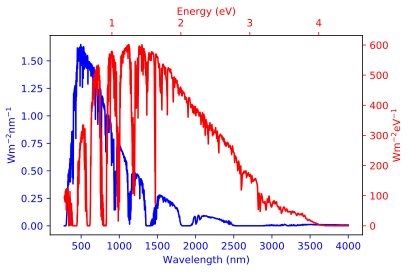

In [114]:
#plot Am1.5 in energy and wavelength

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(wavelength, spectral_irr_w, color='b')
ax.set_xlabel('Wavelength (nm)', color='b')
ax.set_ylabel('W$\mathregular{m^{-2}nm^{-1}}$',color='b')
ax.tick_params('x', colors='b')
ax.tick_params('y', colors='b')

ax2.plot(E_data/eV, spectral_irr*eV, color='r')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylabel('W$\mathregular{m^{-2}eV^{-1}}$',  color='r')
ax2.set_xlabel('Energy (eV)', color='r')
ax2.tick_params('x', colors='r')
ax2.tick_params('y', colors='r')
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 

fig.tight_layout()
plt.show()


In [116]:
F_a_ASTMG = np.trapz(spectral_irr[E_data>E_g],E_data[E_data>E_g])

In [42]:
2*Sigma/(h**3*c**2)

IndentationError: unexpected indent (<ipython-input-42-c65ae0f95522>, line 2)